In [1]:
import numpy as np
import pandas as pd


from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#set visualization requirements
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
## filter warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
df = pd.read_csv("KDDTrain+_20Percent.txt", names=feature)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df.shape # data columns number and rows number

(25192, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [8]:
# number of attack labels 
df['label'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
phf                    2
multihop               2
spy                    1
land                   1
ftp_write              1
loadmodule             1
Name: label, dtype: int64

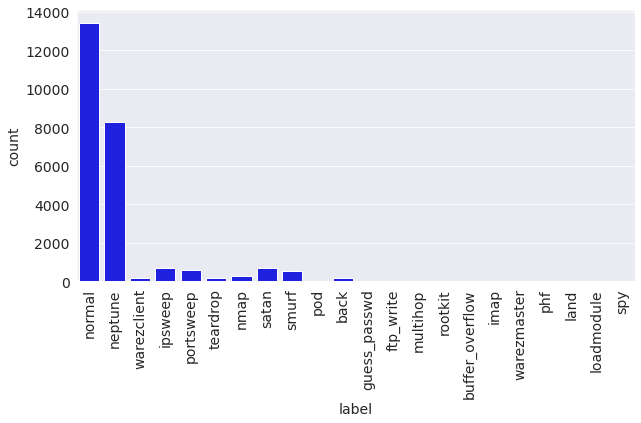

In [9]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='label', data=df, color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

### Attacks can further be grouped into 4 groups
> DoS is an attack that tries to shut down traffic flow to and from the target system. Because of the unusually high volume of traffic, the IDS must shut down in order to defend itself. This stops regular traffic from accessing a network. When an online store receives a large volume of orders on a day when there is a huge discount, the network may become overwhelmed and shut down, preventing paying consumers from making any purchases. In the data set, this attack occurs the most frequently.<br>

> An attack that tries to gather information from a network is called a probe or surveillance. Whether it's financial information or customer personal information, the objective is to pose as a thief and steal vital information.<br>

> A U2R attack begins with a regular user account and attempts to log into the system or network as a super-user (root). To acquire access or root privileges, the attacker tries to use a system's weaknesses.<br>

>An assault known as R2L seeks to acquire physical access to a distant machine. An attacker attempts to "hack" their way into the network even if they do not have local access to the system or network.<br>

## EDA

## Univariate analysis
### Target variable

In [10]:
# changing attack labels to their respective attack class
def group_labels(df):
    df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

group_labels(df)

In [11]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

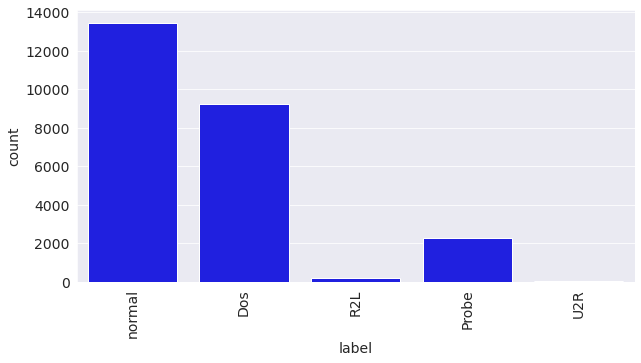

In [12]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='label', data=df, color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [13]:
# distribution of attack classes
df.label.value_counts()

normal    13449
Dos        9234
Probe      2289
R2L         209
U2R          11
Name: label, dtype: int64

### Group label column into normal access and attack access for binary classification.

In [14]:
# Two categories of access
df['target'] = df.label.map(lambda x:'normal' if x=='normal' else 'attack')

In [15]:
df['target'].value_counts(normalize=True)

normal    0.53386
attack    0.46614
Name: target, dtype: float64

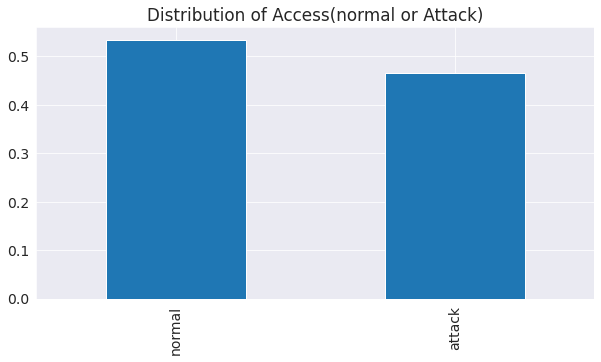

In [16]:
df['target'].value_counts(normalize=True).plot(kind = 'bar', title='Distribution of Access(normal or Attack)');

**53.4% of the access were normal while 46.6% were attacks.**

## Protocol distribution

In [17]:
df['protocol_type'].value_counts(normalize=True)

tcp     0.814782
udp     0.119522
icmp    0.065695
Name: protocol_type, dtype: float64

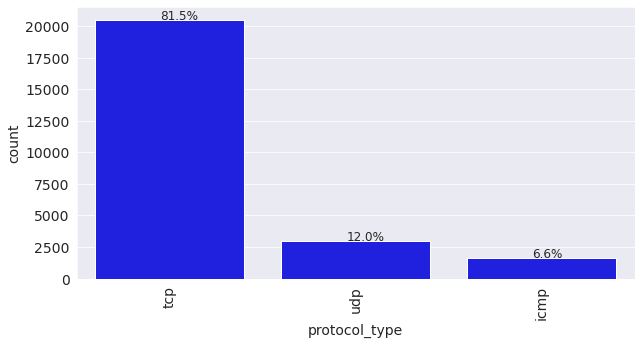

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='protocol_type', data=df, color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
without_hue(ax, df['protocol_type'])
plt.show()

* **tcp** is the most used protocol for connection.

## Service distribution

In [19]:
df['service'].value_counts(normalize=True)[:10]

http        0.317680
private     0.172714
domain_u    0.072245
smtp        0.057518
ftp_data    0.055414
eco_i       0.036083
other       0.034058
ecr_i       0.024333
telnet      0.019173
finger      0.014528
Name: service, dtype: float64

## plot bargraph of top-10 network services used

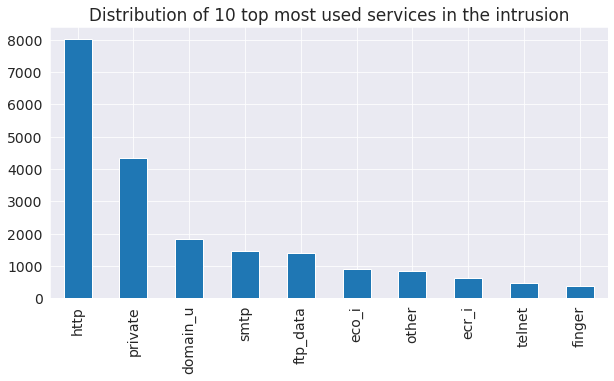

In [20]:
df['service'].value_counts()[:10].plot(kind="bar")
plt.title("Distribution of 10 top most used services in the intrusion")
plt.show()

**http is the top most used network service followed by private and domain_u respectively**
**32% were http ones, while private were 17%**

### Flag (normal or error status of the connection )

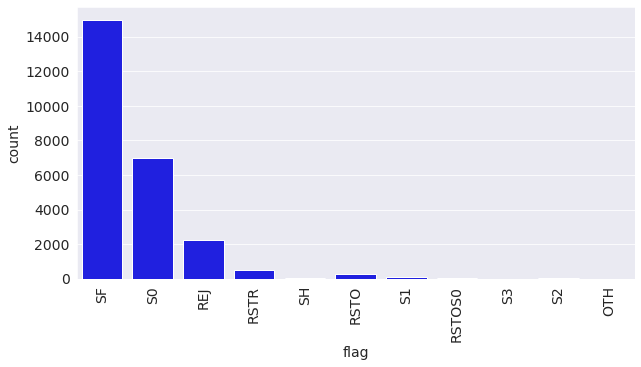

In [21]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='flag', data=df, color='blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

### logged_in(1 if successfully logged in; 0 otherwise )

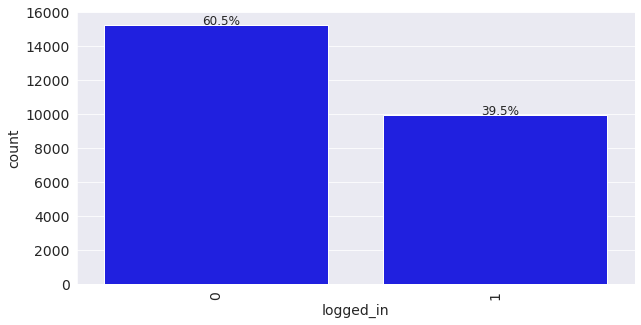

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='logged_in', data=df, color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
without_hue(ax, df['logged_in'])
plt.show()

> 60.5% of the users were logged in successfully whle 39.5% were not

### root_shell(1 if root shell is obtained; 0 otherwise)

In [23]:
df['root_shell'].value_counts(normalize=True)

0    0.998452
1    0.001548
Name: root_shell, dtype: float64

### su_attempted(	1 if  **su root** command attempted; 0 otherwise )

In [24]:
df['su_attempted'].value_counts(normalize=True)

0    0.999166
2    0.000516
1    0.000318
Name: su_attempted, dtype: float64

### is_host_login(1 if the login belongs to the **hot** list; 0 otherwise )

In [25]:
df['is_host_login'].value_counts(normalize=True)

0    1.0
Name: is_host_login, dtype: float64

### is_guest_login

In [26]:
df['is_guest_login'].value_counts(normalize=True)

0    0.99087
1    0.00913
Name: is_guest_login, dtype: float64

### count(number of connections to the same host as the current connection in the past two seconds)

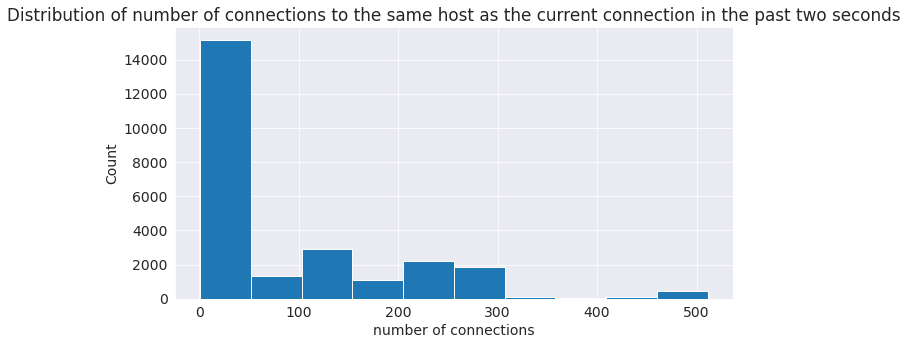

In [27]:
sns.distplot(
    df['count'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='number of connections', ylabel='Count')
plt.title("Distribution of number of connections to the same host as the current connection in the past two seconds")
plt.show()

### dst_host_count

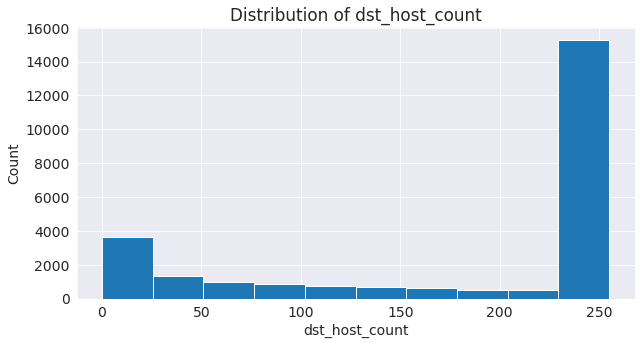

In [28]:
sns.distplot(
    df['dst_host_count'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='dst_host_count', ylabel='Count')
plt.title("Distribution of dst_host_count")
plt.show()

## Bivariate analysis

### protocol_type vs target

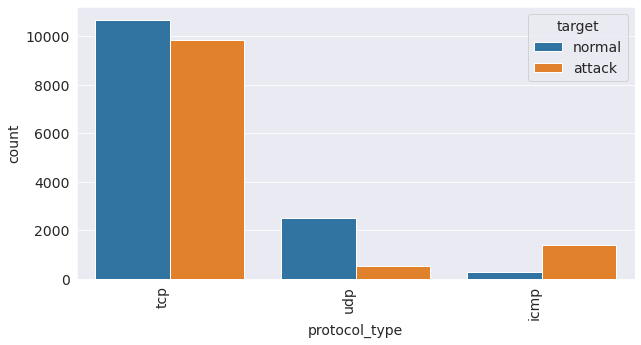

In [29]:
chart = sns.countplot(x="protocol_type", hue="target", data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right');

### Service vs Attack

In [30]:
pd.set_option('display.max_rows', None)
pd.crosstab(df["service"], df["target"], 
            normalize=True, margins=True)

target,attack,normal,All
service,,,
IRC,0.000000,0.001588,0.001588
X11,0.000119,0.000754,0.000873
Z39_50,0.006828,0.000000,0.006828
auth,0.005875,0.001628,0.007502
bgp,0.005795,0.000000,0.005795
courier,0.006510,0.000000,0.006510
csnet_ns,0.004406,0.000000,0.004406
ctf,0.005041,0.000000,0.005041
daytime,0.004247,0.000000,0.004247


In [31]:
top_10_service = df['service'].value_counts()[:10].index.tolist()

top_10_service_df = df[df['service'].isin(top_10_service)]
top_10_service_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [32]:
top_10_service

['http',
 'private',
 'domain_u',
 'smtp',
 'ftp_data',
 'eco_i',
 'other',
 'ecr_i',
 'telnet',
 'finger']

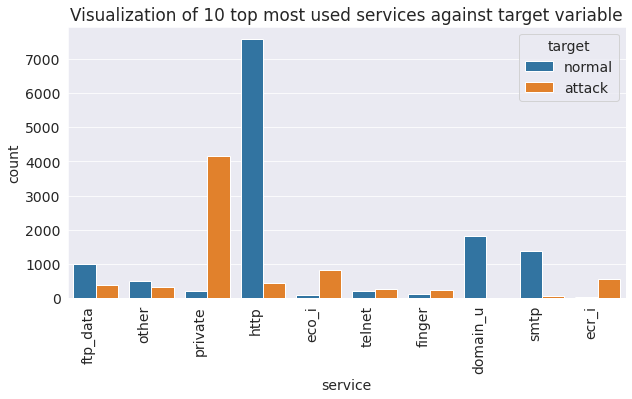

In [33]:
chart = sns.countplot(x="service", hue="target", data=top_10_service_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Visualization of 10 top most used services against target variable")
plt.show()

**private is the most service that cause attack, also eco_i and ecr_i are the services used for attacks.**

## Data preparation

### convert categorical to dummies

In [34]:
## pd.get_dummies
df_clean = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
df_clean.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
# Two categories of access
df_clean['target'] = df_clean.label.map(lambda x:'normal' if x=='normal' else 'attack')

In [36]:
# drop unuseful column 
df_clean.drop('difficulty', axis=1, inplace=True)

## Encode categorical column

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
df_clean['target_encode'] = LabelEncoder().fit_transform(df_clean['target'])

df_clean[['target', 'target_encode']].head()

,target,target_encode
0,normal,1
1,normal,1
2,attack,0
3,normal,1
4,normal,1


**0 is the attack, while 1 is the normal**

## Check correlation

### return top 10 positive and top 10 negative correlated columns

In [39]:
corr2 = df_clean.corr('spearman')[['target_encode']].sort_values(by='target_encode', ascending=False)
top_positive = corr2[:10].index
top_negative = corr2[104:114].index
list(top_negative)

['dst_host_count',
 'service_private',
 'count',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'flag_S0',
 'serror_rate',
 'diff_srv_rate']

In [40]:
list(top_positive)

['target_encode',
 'flag_SF',
 'dst_bytes',
 'same_srv_rate',
 'src_bytes',
 'logged_in',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'service_http',
 'dst_host_srv_diff_host_rate']

In [41]:
corr_list = list(top_negative) + list(top_positive)
corr_list

['dst_host_count',
 'service_private',
 'count',
 'dst_host_diff_srv_rate',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'flag_S0',
 'serror_rate',
 'diff_srv_rate',
 'target_encode',
 'flag_SF',
 'dst_bytes',
 'same_srv_rate',
 'src_bytes',
 'logged_in',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'service_http',
 'dst_host_srv_diff_host_rate']

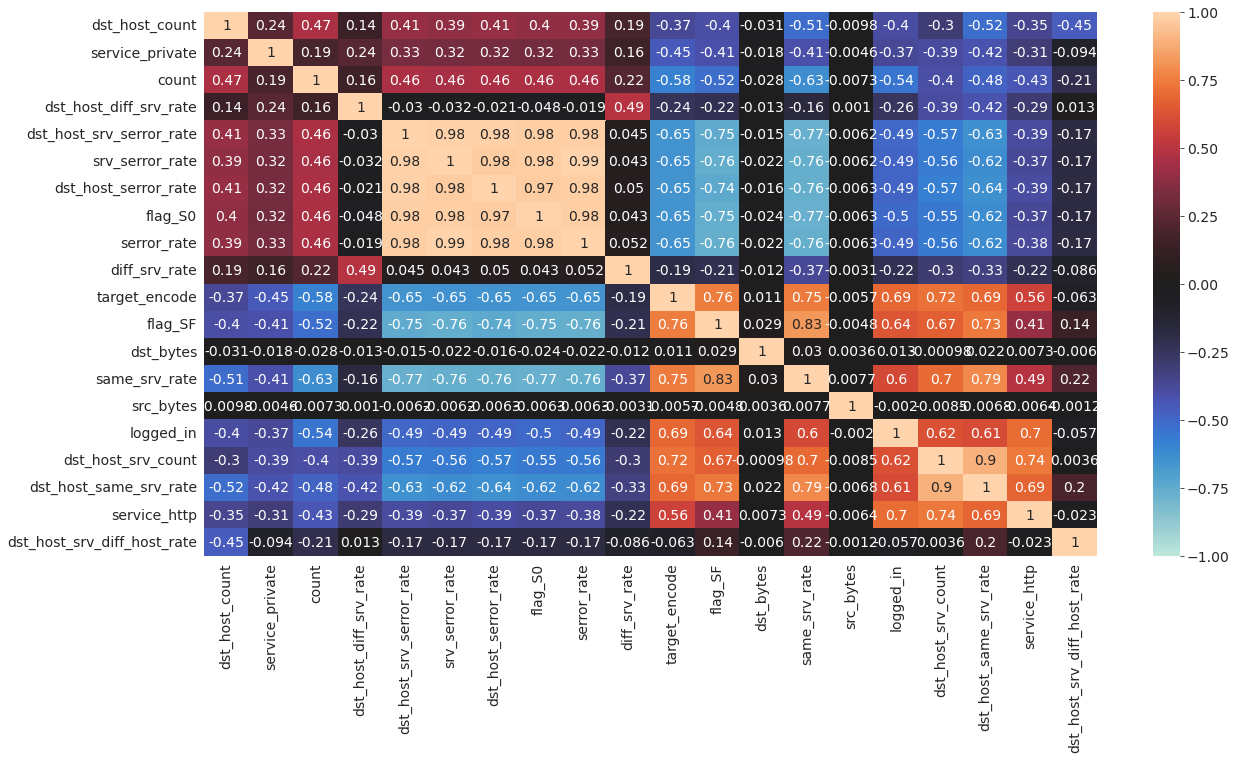

In [42]:
df_corr= df_clean[corr_list]

plt.figure(figsize=(20,10))
sns.heatmap(df_corr.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

## Clustering
### Kmeans Clustering

In [43]:
df_cluster = df_clean.drop(['label', 'target', 'target_encode'], axis=1)

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(df_cluster)

KMeans(n_clusters=2, random_state=0)

In [45]:
kmeans.cluster_centers_

array([[3.03649756e+02, 9.17899631e+03, 3.49198579e+03, 7.93934342e-05,
        2.37386368e-02, 3.96967171e-05, 1.98046922e-01, 1.19090151e-03,
        3.94783851e-01, 2.27859156e-01, 1.54817197e-03, 1.34968838e-03,
        2.49851137e-01, 1.47274820e-02, 3.57270454e-04, 4.32694216e-03,
        0.00000000e+00, 0.00000000e+00, 9.13024493e-03, 8.45944980e+01,
        2.76998134e+01, 2.86349093e-01, 2.83773570e-01, 1.18595133e-01,
        1.20225477e-01, 6.60545433e-01, 6.23655274e-02, 9.59346592e-02,
        1.82536223e+02, 1.15067524e+02, 5.19810250e-01, 8.25370172e-02,
        1.47455440e-01, 3.18455004e-02, 2.85811599e-01, 2.79857489e-01,
        1.17801596e-01, 1.18754317e-01, 8.14775118e-01, 1.19526815e-01,
        8.73327776e-04, 6.82783534e-03, 7.50267953e-03, 5.79572069e-03,
        6.51026160e-03, 4.40633560e-03, 5.04148307e-03, 4.24754873e-03,
        4.16815529e-03, 4.32694216e-03, 7.22480251e-02, 2.58028661e-03,
        3.60843158e-02, 2.43340876e-02, 4.36663888e-03, 3.612401

In [46]:
kmeans.inertia_

919578324200223.5

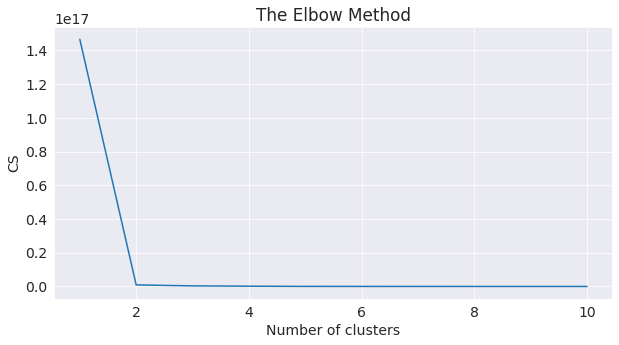

In [47]:
#from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cluster)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**A good number for the groups are 2, elbow joint**
> Thus we can group label into two lablels, **binary** as normal and attack access.

In [48]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
y_cluster = df_clean['target_encode']
correct_labels = sum(y_cluster == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_cluster.size))

Result: 11529 out of 25192 samples were correctly labeled.


In [49]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_cluster.size)))

Accuracy score: 0.46


**Clustering model had a perfomance of 0.46.%**

## Classification
### Building of classification model to classify access whether it's an attack or normall access 

## Separate dependent and independent feature

In [50]:
X = df_clean.drop(['label', 'target', 'target_encode'], axis=1)
y = df_clean['target_encode']

### Split data into training and testing datasets

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=0, stratify=y)

### Logistic Regression

In [52]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# predictions on test dataset
logreg_pred = logreg.predict(X_test)

In [53]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, logreg_pred)
cnf_matrix

array([[2518,  418],
       [ 343, 3019]])

Text(0.5, 320.8, 'Predicted label')

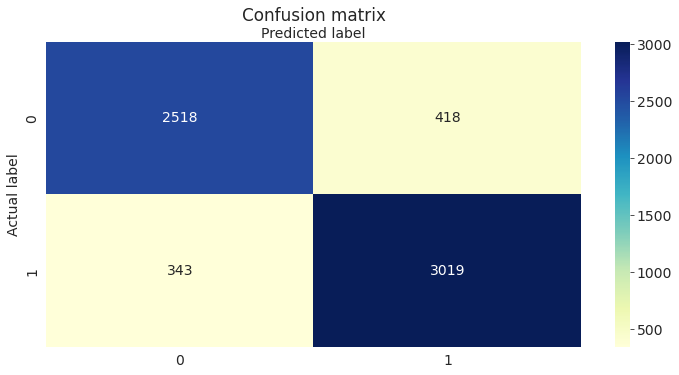

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
print(metrics.classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2936
           1       0.88      0.90      0.89      3362

    accuracy                           0.88      6298
   macro avg       0.88      0.88      0.88      6298
weighted avg       0.88      0.88      0.88      6298



## Xgboost

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [57]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

[18:07:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, xgb_pred)
cnf_matrix

array([[2923,   13],
       [   8, 3354]])

Text(0.5, 320.8, 'Predicted label')

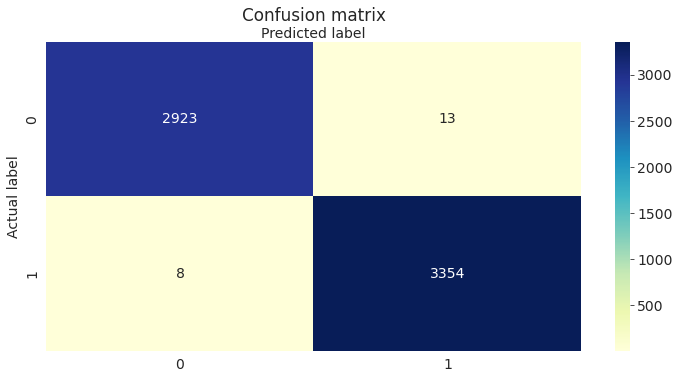

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
print(metrics.classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2936
           1       1.00      1.00      1.00      3362

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298



In [61]:
## Random Forest Classifier

### Ensemble Classification

### bagging classifier

In [62]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [63]:
bagging_clf = BaggingClassifier(RandomForestClassifier(n_estimators=50),
                       random_state=0).fit(X_train, y_train)

In [64]:
bagging_clf_pred = bagging_clf.predict(X_test)

In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, bagging_clf_pred)
cnf_matrix

array([[2917,   19],
       [   6, 3356]])

In [66]:
print(metrics.classification_report(y_test, bagging_clf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2936
           1       0.99      1.00      1.00      3362

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298



## Ensemble Voting classifier

In [67]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()


eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

eclf1 = eclf1.fit(X_train, y_train)

In [69]:
eclf1_pred = eclf1.predict(X_test)

In [70]:
cnf_matrix = metrics.confusion_matrix(y_test, eclf1_pred)
cnf_matrix

array([[2517,  419],
       [  36, 3326]])

In [71]:
print(metrics.classification_report(y_test, eclf1_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2936
           1       0.89      0.99      0.94      3362

    accuracy                           0.93      6298
   macro avg       0.94      0.92      0.93      6298
weighted avg       0.93      0.93      0.93      6298



## Neural Networks

In [72]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

591/591 [==============================] - 1s 2ms/step - loss: 646.0543 - accuracy: 0.8693 - precision: 0.8422 - recall: 0.9293
Epoch 2/100
591/591 [==============================] - 2s 3ms/step - loss: 0.2776 - accuracy: 0.9292 - precision: 0.8891 - recall: 0.9910
Epoch 3/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2162 - accuracy: 0.9332 - precision: 0.8936 - recall: 0.9932
Epoch 4/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy

591/591 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 55/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2168 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 56/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 57/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 58/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 59/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2168 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 60/100
591/591 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9336 - precision: 0.8918 - recall: 0.9965
Epoch 61/100
591/591 [==================

In [73]:
neural_pred = model.predict(X_test)
neural_pred

array([[0.02708414],
       [0.90616083],
       [0.90616083],
       ...,
       [0.02708414],
       [0.02708414],
       [0.90616083]], dtype=float32)

In [74]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(neural_pred)
]
prediction_classes[:20]

[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [75]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction_classes)
cnf_matrix

array([[2611,  325],
       [ 114, 3248]])

Text(0.5, 320.8, 'Predicted label')

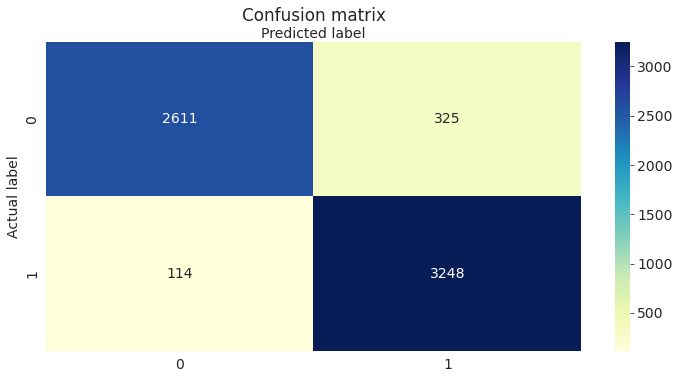

In [76]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
print(metrics.classification_report(y_test, prediction_classes))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2936
           1       0.91      0.97      0.94      3362

    accuracy                           0.93      6298
   macro avg       0.93      0.93      0.93      6298
weighted avg       0.93      0.93      0.93      6298

